<a href="https://colab.research.google.com/github/oyyarko/keras_tut/blob/master/CIFAR10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.datasets import cifar10
import tensorflow.python.keras

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
print(x_train.shape[0])
print(x_test.shape[0])

50000
10000


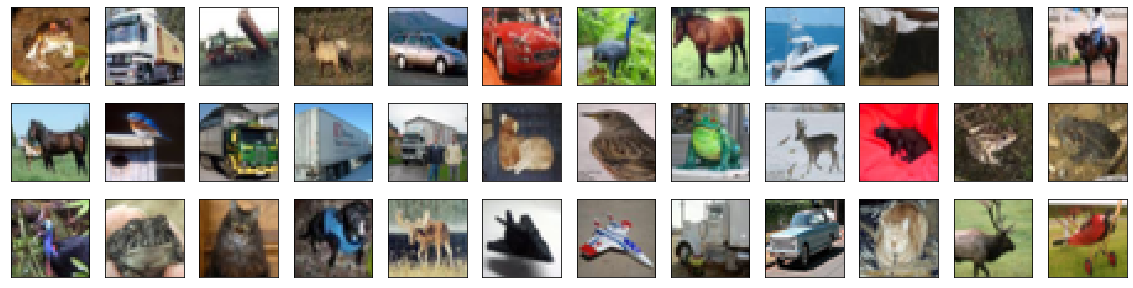

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [25]:
from keras.utils import np_utils
import keras

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('X Train shape: ',x_train.shape)

print(x_train.shape[0], 'X Train samples')
print(x_test.shape[0], 'X Test samples')
print(x_valid.shape[0], 'X Valid samples')

X Train shape:  (45000, 32, 32, 3)
45000 X Train samples
10000 X Test samples
5000 X Valid samples


In [26]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [36]:
from tensorflow.python.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size = 32, epochs = 100, verbose=2, callbacks=[checkpointer], validation_data=(x_valid, y_valid), shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.73826, saving model to model.weights.best.hdf5
45000/45000 - 6s - loss: 1.8292 - acc: 0.3467 - val_loss: 1.7383 - val_acc: 0.3318
Epoch 2/100

Epoch 00002: val_loss improved from 1.73826 to 1.68060, saving model to model.weights.best.hdf5
45000/45000 - 6s - loss: 1.8249 - acc: 0.3430 - val_loss: 1.6806 - val_acc: 0.3910
Epoch 3/100

Epoch 00003: val_loss improved from 1.68060 to 1.64422, saving model to model.weights.best.hdf5
45000/45000 - 6s - loss: 1.8254 - acc: 0.3425 - val_loss: 1.6442 - val_acc: 0.3952
Epoch 4/100

Epoch 00004: val_loss did not improve from 1.64422
45000/45000 - 6s - loss: 1.8395 - acc: 0.3427 - val_loss: 1.7484 - val_acc: 0.3308
Epoch 5/100

Epoch 00005: val_loss did not improve from 1.64422
45000/45000 - 6s - loss: 1.8535 - acc: 0.3340 - val_loss: 1.8541 - val_acc: 0.2922
Epoch 6/100

Epoch 00006: val_loss did not improve from 1.64422
45000/45000 - 6s - lo

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy: ', score[1])


 Test accuracy:  0.2793


In [0]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

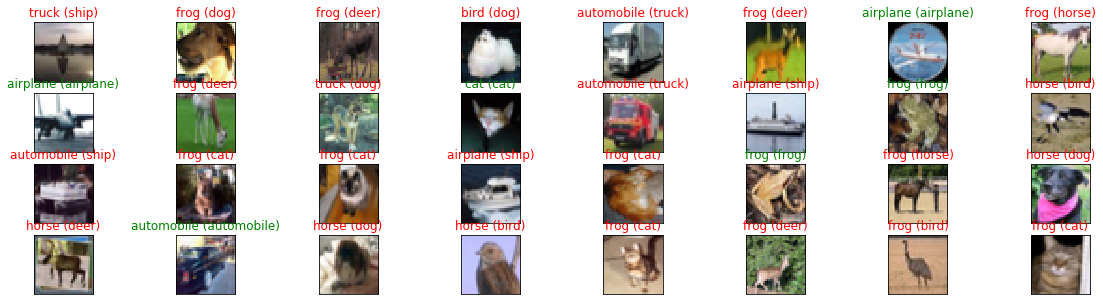

In [39]:
fig = plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                color=("green" if pred_idx == true_idx else "red"))